In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("mall_customers.csv")

In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df = df.drop("CustomerID", axis=1)

In [7]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [8]:
df = df.rename(columns = {"Gender":"gender", "Age":"age", "Annual Income (k$)":"income", "Spending Score (1-100)":"score"})

In [9]:
df.head()

,gender,age,income,score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [10]:
df1 = df.copy()
df2 = df.copy()

In [11]:
df.shape

(200, 4)

# Visualize

Text(0.5, 1.0, 'Age and income plot')

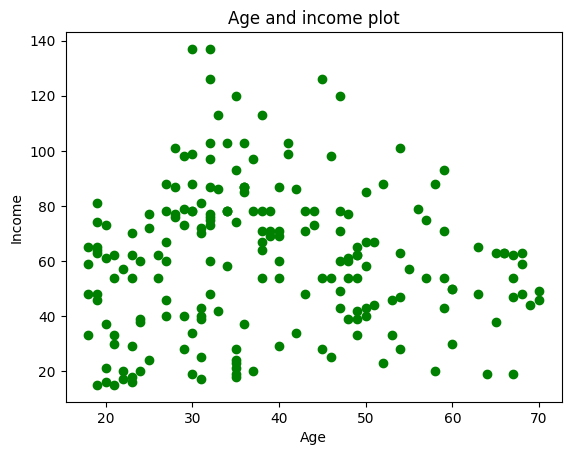

In [12]:
# age and income

plt.scatter(df.age, df.income, color ='green')
plt.xlabel("Age")
plt.ylabel("Income")
plt.title("Age and income plot")

Text(0.5, 1.0, 'Score and income plot')

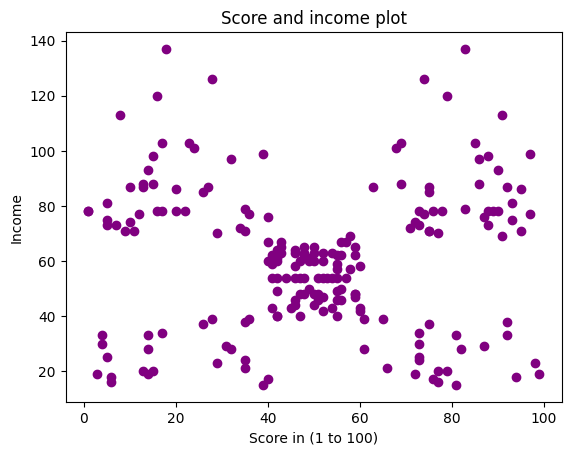

In [13]:
# income and score

plt.scatter(df.score , df.income, color='purple')
plt.xlabel("Score in (1 to 100)")
plt.ylabel("Income")
plt.title("Score and income plot")

# Pairplot

C:\Users\asadu\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


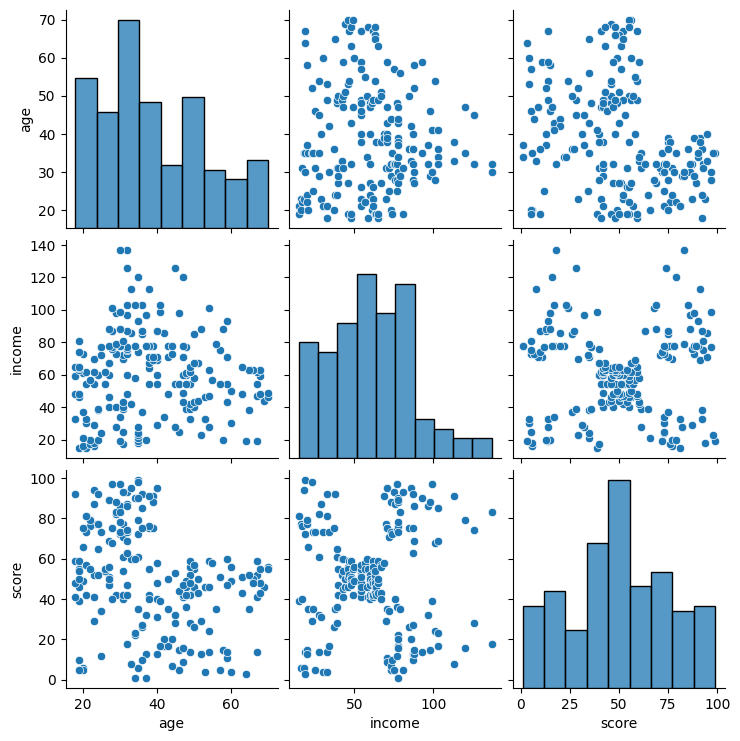

In [14]:
sns.pairplot(df[['age', 'income', 'score']])

Text(0.5, 1.0, 'Score and income plot')

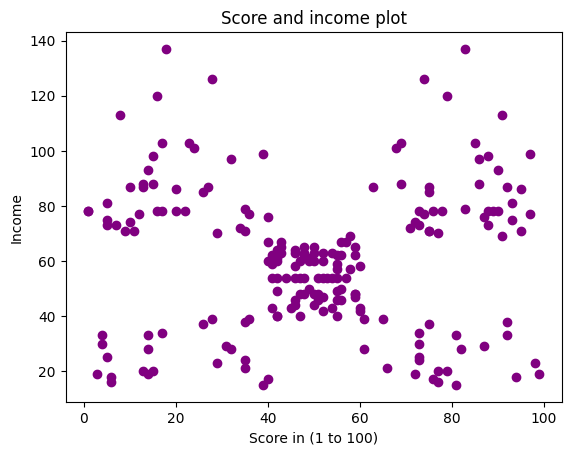

In [15]:
plt.scatter(df.score , df.income, color='purple')
plt.xlabel("Score in (1 to 100)")
plt.ylabel("Income")
plt.title("Score and income plot")

# K-Means

In [16]:
plt

<module 'matplotlib.pyplot' from 'C:\\Users\\asadu\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\matplotlib\\pyplot.py'>

In [17]:
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
from sklearn.cluster import KMeans

In [18]:
km = KMeans(n_clusters=8) # creating KMeans ojects

In [19]:
km.fit(df[['score', 'income']]) # fit() -> training the model data

C:\Users\asadu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans()

In [20]:
df.head()

,gender,age,income,score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [21]:
df['new_cluster'] = km.predict(df[['score', 'income']])

In [22]:
df.head()

,gender,age,income,score,new_cluster
0,Male,19,15,39,5
1,Male,21,15,81,4
2,Female,20,16,6,5
3,Female,23,16,77,4
4,Female,31,17,40,5


# Visualize

In [23]:
df4 = df[df.new_cluster == 4]

In [24]:
df4.head()

,gender,age,income,score,new_cluster
1,Male,21,15,81,4
3,Female,23,16,77,4
5,Female,22,17,76,4
7,Female,23,18,94,4
9,Female,30,19,72,4


In [25]:
df4.shape

(21, 5)

Text(0.5, 1.0, 'Score and income plot')

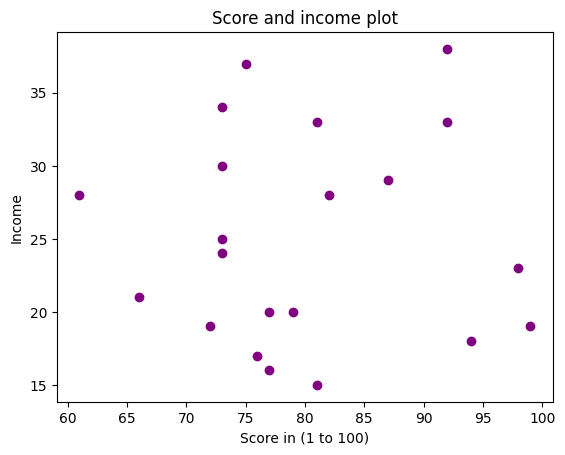

In [26]:
# income and score

plt.scatter(df4.score , df4.income, color='purple')
plt.xlabel("Score in (1 to 100)")
plt.ylabel("Income")
plt.title("Score and income plot")

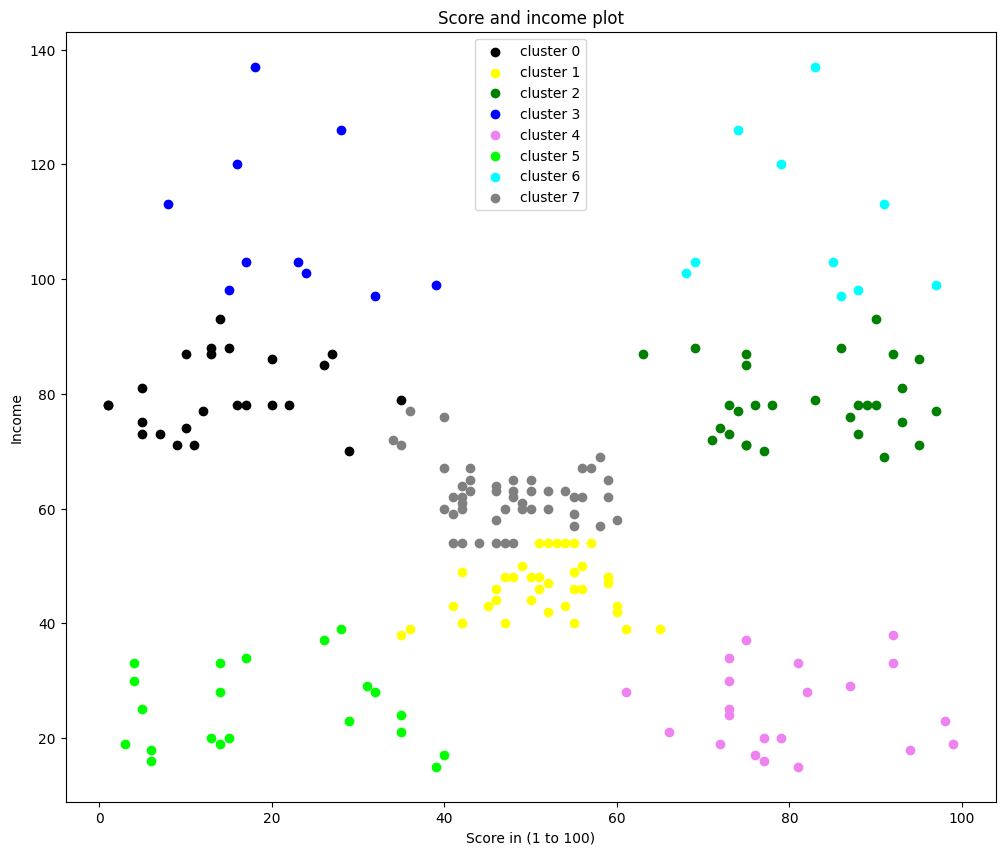

In [27]:
df0 = df[df.new_cluster == 0]
df1 = df[df.new_cluster == 1]
df2 = df[df.new_cluster == 2]
df3 = df[df.new_cluster == 3]
df4 = df[df.new_cluster == 4]
df5 = df[df.new_cluster == 5]
df6 = df[df.new_cluster == 6]
df7 = df[df.new_cluster == 7]

plt.figure(figsize = (12, 10)) # figure method must e call from there

plt.scatter(df0.score, df0.income, color='black', label='cluster 0')
plt.scatter(df1.score, df1.income, color='yellow', label='cluster 1')
plt.scatter(df2.score, df2.income, color='green', label='cluster 2')
plt.scatter(df3.score, df3.income, color='blue', label='cluster 3')
plt.scatter(df4.score, df4.income, color='violet', label='cluster 4')
plt.scatter(df5.score, df5.income, color='lime', label='cluster 5')
plt.scatter(df6.score, df6.income, color='cyan', label='cluster 6')
plt.scatter(df7.score, df7.income, color='gray', label='cluster 7')

plt.xlabel("Score in (1 to 100)")
plt.ylabel("Income")
plt.title("Score and income plot")

plt.legend()
plt.show()

# Centroid

In [28]:
center1 = km.cluster_centers_
center1

array([[ 14.29166667,  79.70833333],
       [ 51.26315789,  45.97368421],
       [ 82.17241379,  78.55172414],
       [ 22.        , 109.7       ],
       [ 80.04761905,  25.0952381 ],
       [ 19.52380952,  25.14285714],
       [ 82.        , 109.7       ],
       [ 47.55319149,  62.23404255]])

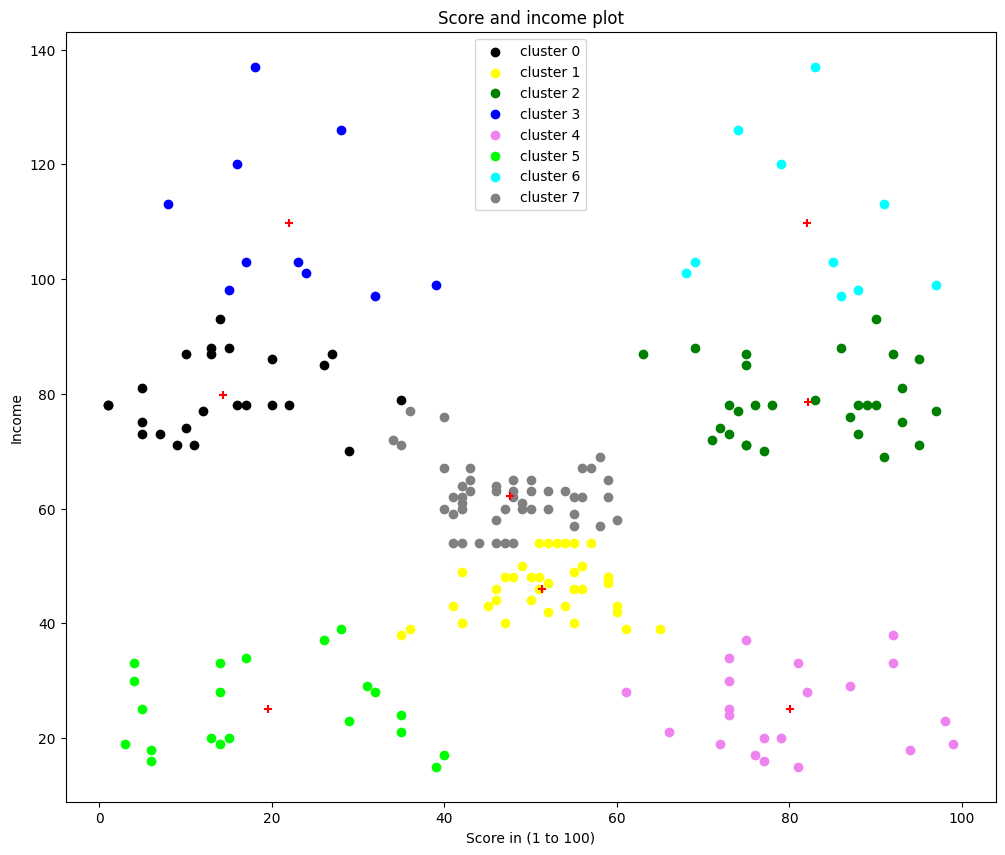

In [29]:
df0 = df[df.new_cluster == 0]
df1 = df[df.new_cluster == 1]
df2 = df[df.new_cluster == 2]
df3 = df[df.new_cluster == 3]
df4 = df[df.new_cluster == 4]
df5 = df[df.new_cluster == 5]
df6 = df[df.new_cluster == 6]
df7 = df[df.new_cluster == 7]

plt.figure(figsize = (12, 10)) # figure method must e call from there

plt.scatter(df0.score, df0.income, color='black', label='cluster 0')
plt.scatter(df1.score, df1.income, color='yellow', label='cluster 1')
plt.scatter(df2.score, df2.income, color='green', label='cluster 2')
plt.scatter(df3.score, df3.income, color='blue', label='cluster 3')
plt.scatter(df4.score, df4.income, color='violet', label='cluster 4')
plt.scatter(df5.score, df5.income, color='lime', label='cluster 5')
plt.scatter(df6.score, df6.income, color='cyan', label='cluster 6')
plt.scatter(df7.score, df7.income, color='gray', label='cluster 7')

plt.scatter(center1[:, 0], center1[:, 1], color='red', marker='+')

plt.xlabel("Score in (1 to 100)")
plt.ylabel("Income")
plt.title("Score and income plot")

plt.legend()
plt.show()

# Optimizing KMeans

In [30]:
wcss = []
clusters_range = range(1, 15)
for k in cluster_range:
    km2 = KMeans(n_clusters=k)
    km2.fit(df[['income', 'score']])
    wcss.append(km2.inertia_) #inertia is the wcss value


NameError: name 'cluster_range' is not defined

In [ ]:
wcss

In [ ]:
plt.plot(clusters_range, wcss, marker = 'o')
plt.xlabel('cluster')

# Knee Locator

In [ ]:
from kneed import KneeLocator

In [ ]:
kn = KneeLocator(clusters_range, wcss, curve='convex', direction='decreasing')

In [ ]:
kn.plot_knee()

In [ ]:
kn.knee

# After Optimizing

In [ ]:
km5 = KMeans(n_clusters=5) # creating KMeans ojects
km5.fit(df[['score', 'income']]) # fit() -> training the model data

In [ ]:
df['optimize_cluster'] = km5.predict(df[['score', 'income']])
df.head()

In [ ]:
center2 = km5.cluster_centers_
center2

In [ ]:
df0 = df[df.optimize_cluster == 0]
df1 = df[df.optimize_cluster == 1]
df2 = df[df.optimize_cluster == 2]
df3 = df[df.optimize_cluster == 3]
df4 = df[df.optimize_cluster == 4]

plt.figure(figsize = (12, 10)) # figure method must e call from there

plt.scatter(df0.score, df0.income, color='black', label='cluster 0')
plt.scatter(df1.score, df1.income, color='yellow', label='cluster 1')
plt.scatter(df2.score, df2.income, color='green', label='cluster 2')
plt.scatter(df3.score, df3.income, color='lime', label='cluster 3')
plt.scatter(df4.score, df4.income, color='violet', label='cluster 4')

plt.scatter(center2[:, 0], center2[:, 1], color='red', marker='+')

plt.xlabel("Score in (1 to 100)")
plt.ylabel("Income")
plt.title("Score and income plot")

plt.legend()
plt.show()